In [157]:
import matplotlib.pyplot as plt 
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras import layers, models, regularizers, datasets
import tensorflow as tf 


In [158]:
#I've just realised, we have to insert the 2nd assignment into the 1st one and compare it in the L1 vs L2 regularization 

In [159]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [160]:
assert x_train.shape == (60000, 28, 28)
assert x_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

## Load the MNIST Dataset

`Flattening`: The reshape(x_train.shape[0], -1) method transforms the training data (x_train) from its original multi-dimensional shape (e.g., for images, this could be width x height x channels) into a two-dimensional array. Each sample is converted into a single row, where the first dimension is the number of samples, and the second dimension contains all the pixel values in a flattened format. This is essential for feeding the data into models that expect a flat input, such as fully connected layers in neural networks.

`Normalization`: The division by 255.0 scales the pixel values to a range between 0 and 1, as pixel values in images typically range from 0 to 255. Normalization helps improve model training by ensuring that the input features have similar scales, which enhances convergence speed and overall model performance.

`Combined Effect`: By flattening and normalizing the data simultaneously, the code prepares the input data for effective processing by machine learning models, ensuring that they can learn efficiently from the data while reducing the risk of issues caused by varying input scales.

In [161]:
x_train = x_train.reshape(x_train.shape[0], -1) / 255.0
x_test = x_test.reshape(x_test.shape[0], -1) / 255.0
print (x_train)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


## Time to one-hot encode the data.

In [162]:
def one_hot_encode(y, num_classes):
    return np.eye(num_classes)[y]

One-hot encoding is applied only to the target variable (y_train and y_test) to convert categorical class labels into a binary format suitable for classification tasks. This transformation allows the model to output probabilities for each class and avoids implying any ordinal relationships. The input features (x_train and x_test) are typically left in their original format to preserve their numerical or categorical significance for effective model training.

In [163]:
y_train_encoded = one_hot_encode(y_train, 10)
y_test_encoded = one_hot_encode(y_test, 10)

# Let's define a Neural Network Now:

In [164]:
import numpy as np  # Import NumPy for numerical operations

class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size, learning_rate=0.01):
        # Initialize weights and biases for input to hidden layer
        self.W1 = np.random.randn(input_size, hidden_size) * 0.01  # Small random weights
        self.b1 = np.zeros((1, hidden_size))  # Biases initialized to zero

        # Initialize weights and biases for hidden to output layer
        self.W2 = np.random.randn(hidden_size, output_size) * 0.01  # Small random weights
        self.b2 = np.zeros((1, output_size))  # Biases initialized to zero

        self.learning_rate = learning_rate  # Set learning rate

    def softmax(self, x):
        # Compute the softmax of the input for multi-class classification
        exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))  # For numerical stability
        return exp_x / np.sum(exp_x, axis=1, keepdims=True)  # Normalize to get probabilities

    def forward(self, X):
        # Perform forward propagation
        self.z1 = np.dot(X, self.W1) + self.b1  # Linear combination for hidden layer
        self.a1 = np.tanh(self.z1)  # Activation function for hidden layer (tanh)
        self.z2 = np.dot(self.a1, self.W2) + self.b2  # Linear combination for output layer
        self.a2 = self.softmax(self.z2)  # Softmax activation for output layer
        return self.a2  # Return the output probabilities

    def backward(self, X, y, output):
        # Perform backward propagation to update weights and biases
        m = X.shape[0]  # Number of samples

        # Calculate the error at the output layer
        output_error = output - y  # Derivative of loss w.r.t. output

        # Calculate the error at the hidden layer
        hidden_error = np.dot(output_error, self.W2.T) * (1 - np.tanh(self.z1) ** 2)  # Derivative of tanh

        # Compute gradients
        dW2 = np.dot(self.a1.T, output_error) / m  # Gradient for W2
        db2 = np.sum(output_error, axis=0, keepdims=True) / m  # Gradient for b2
        dW1 = np.dot(X.T, hidden_error) / m  # Gradient for W1
        db1 = np.sum(hidden_error, axis=0, keepdims=True) / m  # Gradient for b1

        # Update weights and biases using gradient descent
        self.W1 -= self.learning_rate * dW1  # Update W1
        self.b1 -= self.learning_rate * db1  # Update b1
        self.W2 -= self.learning_rate * dW2  # Update W2
        self.b2 -= self.learning_rate * db2  # Update b2

    def train(self, X, y, epochs):
        # Train the neural network for a specified number of epochs
        for epoch in range(epochs):
            output = self.forward(X)  # Forward pass
            self.backward(X, y, output)  # Backward pass

            # Print loss every 100 epochs
            if epoch % 5 == 0:
                loss = -np.mean(np.sum(y * np.log(output + 1e-10), axis=1))  # Cross-entropy loss
                print(f"Epoch {epoch}, Loss: {loss:.4f}")

    def predict(self, X):
        # Make predictions for input data
        output = self.forward(X)  # Forward pass to get output
        return np.argmax(output, axis=1)  # Return the class with the highest probability


In [165]:
# Hyperparameters
input_size = 784  # 28x28 pixels
hidden_size = 128  # Number of neurons in the hidden layer
output_size = 10   # 10 classes for digits 0-9
learning_rate = 0.5
epochs = 30

In [166]:
nn = NeuralNetwork(input_size, hidden_size, output_size, learning_rate)
nn.train(x_train, y_train_encoded, epochs)

Epoch 0, Loss: 2.3049
Epoch 5, Loss: 1.9050
Epoch 10, Loss: 1.3161
Epoch 15, Loss: 1.1264
Epoch 20, Loss: 1.0032
Epoch 25, Loss: 0.9745


In [167]:
# Evaluate the model
predictions = nn.predict(x_test)
accuracy = np.mean(predictions == y_test)
print(f"Test Accuracy: {accuracy:.4f}")

Test Accuracy: 0.6582


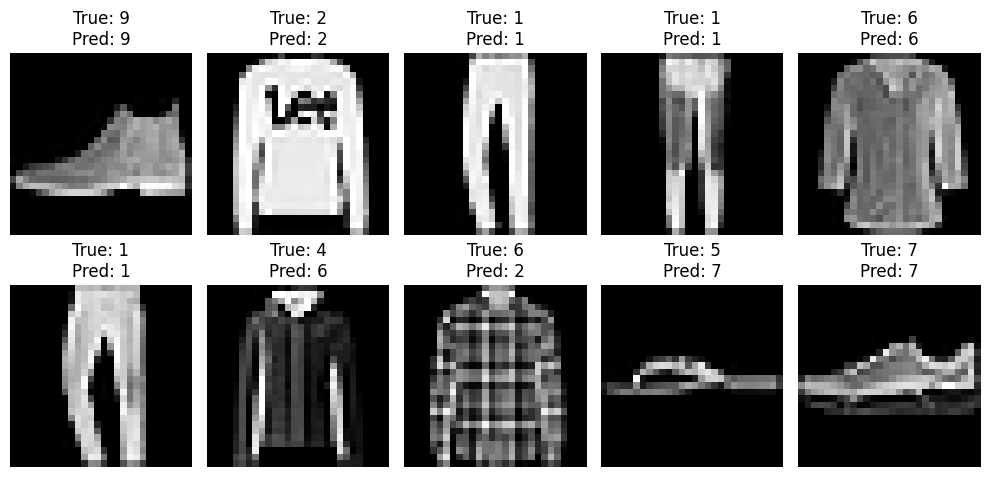

In [168]:
# Visualize some predictions
def plot_predictions(X, y_true, y_pred, num_images=10):
    plt.figure(figsize=(10, 5))
    for i in range(num_images):
        plt.subplot(2, 5, i + 1)
        plt.imshow(X[i].reshape(28, 28), cmap='gray')
        plt.title(f'True: {y_true[i]}\nPred: {y_pred[i]}')
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Visualize predictions on test set
plot_predictions(x_test, y_test, predictions)

## Now Lets try the same with Regularization and CNNs!

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.7456 - loss: 0.6975 - val_accuracy: 0.8629 - val_loss: 0.3731
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.8803 - loss: 0.3320 - val_accuracy: 0.8847 - val_loss: 0.3173
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.8985 - loss: 0.2752 - val_accuracy: 0.8969 - val_loss: 0.2858
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9087 - loss: 0.2467 - val_accuracy: 0.8970 - val_loss: 0.2791
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9211 - loss: 0.2106 - val_accuracy: 0.9064 - val_loss: 0.2545
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.9272 - loss: 0.1903 - val_accuracy: 0.9053 - val_loss: 0.2725
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.9342 - loss: 0.1749 - val_accuracy: 0.9102 - val_loss: 0.2663
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9399 - loss: 0

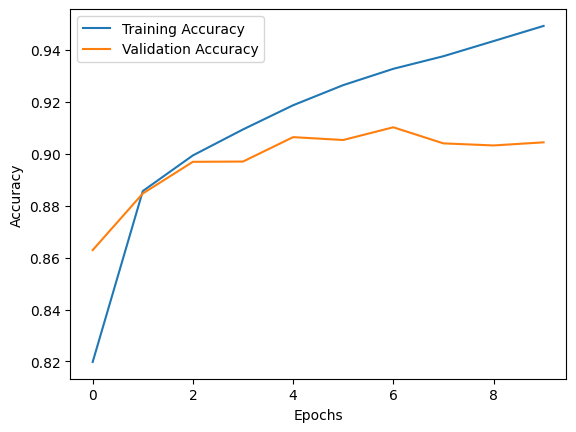

In [174]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Load and preprocess the Fashion MNIST dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

# Build the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

# Visualize training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


Epoch 0, Loss: 2.3142
Epoch 10, Loss: 2.6141
Epoch 20, Loss: 8.1427
Epoch 30, Loss: 6.0294
Epoch 40, Loss: 9.7649
Test Accuracy (L1 Regularization): 0.3494
Epoch 0, Loss: 2.3065
Epoch 10, Loss: 1.4638
Epoch 20, Loss: 1.6718
Epoch 30, Loss: 1.1512
Epoch 40, Loss: 1.0864
Test Accuracy (L2 Regularization): 0.5322


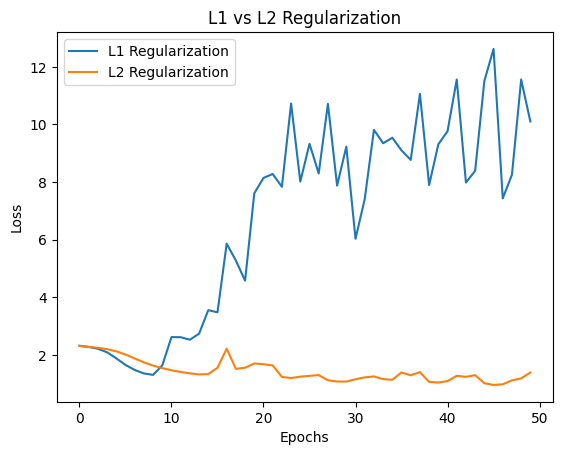

In [175]:
# Let's modify the neural network code to add the comparison between L1 and L2 regularization.

from matplotlib import pyplot as plt
import numpy as np

class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size, learning_rate=0.1, l1_lambda=0.001, l2_lambda=0.001):
        self.W1 = np.random.randn(input_size, hidden_size) * 0.01
        self.b1 = np.zeros((1, hidden_size))
        self.W2 = np.random.randn(hidden_size, output_size) * 0.01
        self.b2 = np.zeros((1, output_size))
        self.learning_rate = learning_rate
        self.l1_lambda = l1_lambda
        self.l2_lambda = l2_lambda
        self.loss_history = []

    def softmax(self, x):
        exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
        return exp_x / (np.sum(exp_x, axis=1, keepdims=True) + 1e-10)

    def forward(self, X):
        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = np.tanh(self.z1)
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        self.a2 = self.softmax(self.z2)
        return self.a2

    def backward(self, X, y, output):
        m = X.shape[0]
        output_error = output - y
        hidden_error = np.dot(output_error, self.W2.T) * (1 - np.tanh(self.z1) ** 2)

        dW2 = np.dot(self.a1.T, output_error) / m
        db2 = np.sum(output_error, axis=0, keepdims=True) / m
        dW1 = np.dot(X.T, hidden_error) / m
        db1 = np.sum(hidden_error, axis=0, keepdims=True) / m

        # L1 regularization
        dW1 += self.l1_lambda * np.sign(self.W1)
        dW2 += self.l1_lambda * np.sign(self.W2)

        # L2 regularization
        dW1 += self.l2_lambda * self.W1
        dW2 += self.l2_lambda * self.W2

        self.W1 -= self.learning_rate * dW1
        self.b1 -= self.learning_rate * db1
        self.W2 -= self.learning_rate * dW2
        self.b2 -= self.learning_rate * db2

    def train(self, X, y, epochs, regularization_type="L2"):
        for epoch in range(epochs):
            output = self.forward(X)
            self.backward(X, y, output)

            # Calculate loss with regularization penalties
            if regularization_type == "L1":
                penalty = self.l1_lambda * (np.sum(np.abs(self.W1)) + np.sum(np.abs(self.W2)))
            else:  # L2 Regularization by default
                penalty = self.l2_lambda * (np.sum(np.square(self.W1)) + np.sum(np.square(self.W2)))

            loss = -np.mean(np.sum(y * np.log(output + 1e-10), axis=1)) + penalty
            self.loss_history.append(loss)

            if epoch % 10 == 0:
                print(f"Epoch {epoch}, Loss: {loss:.4f}")

    def predict(self, X):
        output = self.forward(X)
        return np.argmax(output, axis=1)
    
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])  


# Create two neural network instances: one with L1 and one with L2 regularization
nn_l1 = NeuralNetwork(input_size=784, hidden_size=128, output_size=10, learning_rate=0.75, l1_lambda=0.0001)
nn_l2 = NeuralNetwork(input_size=784, hidden_size=128, output_size=10, learning_rate=0.5, l2_lambda=0.0001)
epochs = 50

# Train with L1 regularization
nn_l1.train(x_train, y_train_encoded, epochs)
predictions_l1 = nn_l1.predict(x_test)
accuracy_l1 = np.mean(predictions_l1 == y_test)
print(f"Test Accuracy (L1 Regularization): {accuracy_l1:.4f}")
# Train with L2 regularization
nn_l2.train(x_train, y_train_encoded, epochs)
predictions_l2 = nn_l2.predict(x_test)
accuracy_l2 = np.mean(predictions_l2 == y_test)
print(f"Test Accuracy (L2 Regularization): {accuracy_l2:.4f}")

# Plot the loss curves for L1 and L2
plt.plot(nn_l1.loss_history, label='L1 Regularization')
plt.plot(nn_l2.loss_history, label='L2 Regularization')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('L1 vs L2 Regularization')
plt.legend()
plt.show()
